# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ahmad Sultani Dayanullah
- **Email:** ahmadsultanidayanullah@gmail.com
- **ID Dicoding:** ahmadsultanid

## Menentukan Pertanyaan Bisnis

1. Bagaimana kondisi jumlah sepeda yang disewa antara weekdays dan holidays?
2. Bagaimana pengaruh musim terhadap jumlah sepeda yang disewa?
3. Bagaimana pengaruh kondisi cuaca terhadap jumlah sepeda yang disewa?
4. Bagaimana tren jumlah sepeda yang disewa setiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [32]:
day_csv = pd.read_csv("./data/day.csv")
hour_csv = pd.read_csv("./data/hour.csv")

df = {"day": day_csv, "hour": hour_csv}

#### Melihat gambaran data yang akan digunakan

In [33]:
df["day"].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
df["hour"].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### 1. Mengecek Tipe Data

In [35]:
df['day'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [36]:
df['hour'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Disimpulkan bahwa terdapat tipe data yang tidak sesuai yaitu column `dteday` yang seharusnya bertipe datetime, bukan object

#### 2. Mengecek Missing Values

In [37]:
df['day'].isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [38]:
df['hour'].isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### 3. Mengecek Duplikasi Data

In [39]:
print("Jumlah duplikasi data pada dataset day.csv: ", df["day"].duplicated().sum())
print("Jumlah duplikasi data pada dataset hour.csv: ", df["hour"].duplicated().sum())

Jumlah duplikasi data pada dataset day.csv:  0
Jumlah duplikasi data pada dataset hour.csv:  0


#### 4. Mengecek Nilai Statistik

In [40]:
df["day"].describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [41]:
df["hour"].describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat nilai yang tidak masuk akal pada setiap kolom

### Cleaning Data

Berdasarkan hasil assessing data, kita perlu mengubah tipe data `dteday` menjadi datetime

In [42]:
df["day"]["dteday"] = pd.to_datetime(df["day"]["dteday"])
df["hour"]["dteday"] = pd.to_datetime(df["hour"]["dteday"])

Perlu dinote bahwa kita hanya akan menggunakan day.csv untuk analisis data, karena data tersebut sudah cukup untuk menjawab pertanyaan bisnis yang telah ditentukan

In [43]:
df["day"].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
df["hour"].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah tipe data int menjadi kategori pada kolom `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, dan `weathersit`

In [45]:
columns = ["season", "mnth", "holiday", "weekday", "weathersit"]

for column in columns:
    df["day"][column] = df["day"][column].astype("category")

Kemudian untuk mempermudah proses analisis, kita juga akan mengganti nama kolom menjadi lebih mudah dibaca.

In [46]:
df["day"].rename(
    columns={
        "yr": "year",
        "mnth": "month",
        "weathersit": "weather_situation",
        "windspeed": "wind_speed",
        "cnt": "count",
        "hum": "humidity",
    },
    inplace=True,
)

Kita juga akan mengkonversi nilai kolom agar lebih mudah dipahami

In [47]:
df["day"].season.replace(
    (1, 2, 3, 4), ("Spring", "Summer", "Fall", "Winter"), inplace=True
)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
df["day"].month.replace(
    (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
    (
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ),
    inplace=True,
)

df["day"].weather_situation.replace(
    (1, 2, 3, 4), ("Clear", "Misty", "Light_rain", "Heavy_rain"), inplace=True
)

df["day"].weekday.replace(
    (0, 1, 2, 3, 4, 5, 6),
    ("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"),
    inplace=True,
)

# konversi year menjadi: 0:2011, 1:2012
df["day"].year.replace((0, 1), ("2011", "2012"), inplace=True)

# konversi holiday menjadi: 0:No, 1:Yes
df["day"].holiday.replace((0, 1), ("No", "Yes"), inplace=True)

# konversi workingday menjadi: 0:No, 1:Yes
df["day"].workingday.replace((0, 1), ("No", "Yes"), inplace=True)

# Menghitung Humidity
df["day"]["humidity"] = df["day"]["humidity"] * 100

Kita juga akan mengklasifikasikan `humidity` menjadi 3 kategori, yaitu low, medium, dan high

In [48]:
def classify_humidity(humidity):
    if humidity < 45:
        return "low"
    elif humidity >= 45 and humidity < 65:
        return "medium"
    else:
        return "high"

df["day"]["humidity_class"] = df["day"]["humidity"].apply(classify_humidity)

Terakhir Kita menyimpan semua perubahan yang telah dilakukan ke dalam file baru

In [ ]:
df["day"].to_csv("./data/clean_day.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore data day

In [49]:
df["day"].describe(include="all")

C:\Users\Dell\AppData\Local\Temp\ipykernel_23336\3845298566.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["day"].describe(include="all")


,instant,dteday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,humidity_class
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,731,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,No,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium
freq,NaN,1,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN


#### Kelompokkan penyewa berdasarkan hari kerja dan hari libur

In [50]:
df["day"].groupby(by="holiday").agg({"count": ["min", "max", "mean", "sum"]})

count                            
          min   max         mean      sum
holiday                                  
No         22  8714  4527.104225  3214244
Yes      1000  7403  3735.000000    78435

Berdasarkan hasil di atas terlihat bahwa pada hari kerja, jumlah sepeda yang disewa lebih banyak dibandingkan pada hari libur

#### Kelompokkan penyewa berdasarkan hari

In [51]:
df["day"].groupby(by="weekday").agg(
    {"count": ["min", "max", "mean", "sum"]}
).sort_values(by=("count", "sum"), ascending=False)

count                           
            min   max         mean     sum
weekday                                   
Friday     1167  8362  4690.288462  487790
Thursday    431  7804  4667.259615  485395
Saturday    627  8714  4550.542857  477807
Wednesday   441  8173  4548.538462  473048
Tuesday     683  7767  4510.663462  469109
Monday       22  7525  4338.123810  455503
Sunday      605  8227  4228.828571  444027

Dapat dilihat bahwa pada hari Jumat, jumlah sepeda yang disewa lebih banyak dibandingkan hari lainnya, sedangkan pada hari Minggu, jumlah sepeda yang disewa paling sedikit

#### Kelompokkan penyewa berdasarkan kondisi cuaca

In [52]:
df["day"].groupby(by="weather_situation").agg(
    {"count": ["min", "max", "mean", "sum"]}
).sort_values(by=("count", "sum"), ascending=False)

count                            
                    min   max         mean      sum
weather_situation                                  
Clear               431  8714  4876.786177  2257952
Misty               605  8362  4035.862348   996858
Light_rain           22  4639  1803.285714    37869

Dapat dilihat bahwa pada hari yang cerah `Clear` memiliki jumlah peminjaman sepeda yang paling tinggi dan sangat berbeda jauh dengan kondisi cuaca lainnya

#### Kelompokkan penyewa berdasarkan musim

In [53]:
df["day"].groupby(by="season").agg({"count": ["min", "max", "mean", "sum"]})

count                            
         min   max         mean      sum
season                                  
Spring   431  7836  2604.132597   471348
Summer   795  8362  4992.331522   918589
Fall    1115  8714  5644.303191  1061129
Winter    22  8555  4728.162921   841613

Dapat dilihat bahwa pada musim panas `Fall` memiliki jumlah peminjaman sepeda yang paling tinggi. sedangkan `Spring` memiliki jumlah peminjaman sepeda yang paling rendah dan cukup jauh berbeda dengan musim lainnya

#### Kelompokkan penyewa berdasarkan Bulan

In [63]:
df["day"].groupby(by=["month", "year"]).agg({"count": ["min", "max", "mean", "sum"]})

count                           
             min   max         mean     sum
month year                                 
Jan   2011   431  1985  1231.903226   38189
      2012  1301  4521  3120.774194   96744
Feb   2011  1005  2927  1721.964286   48215
      2012  1529  5062  3556.448276  103137
Mar   2011   605  3239  2065.967742   64045
      2012  3194  8362  5318.548387  164875
Apr   2011   795  5312  3162.333333   94870
      2012  1027  7460  5807.466667  174224
May   2011  2633  5805  4381.322581  135821
      2012  2843  8294  6318.225806  195865
Jun   2011  3767  5515  4783.733333  143512
      2012  4127  8120  6761.000000  202830
Jul   2011  3285  6043  4559.387097  141341
      2012  4459  8173  6567.967742  203607
Aug   2011  1115  5895  4409.387097  136691
      2012  4549  7865  6919.451613  214503
Sep   2011  1842  5423  4247.266667  127418
      2012  4073  8714  7285.766667  218573
Oct   2011   627  5511  3984.225806  123511
      2012    22  8156  6414.225806  198841
Nov   2011  1495  4486  3405.566667  102167
      2012  2277  6852  5088.800000  152664
Dec   2011   705  3940  2816.870968   87323
      2012   441  6606  3990.741935  123713

### RFM Analysis

In [97]:
current_date = max(df["day"]["dteday"])

rfm_df_registered = (
    df["day"]
    .groupby("registered")
    .agg(
        {
            "dteday": lambda x: (current_date - x.max()).days,  # Recency
            "instant": "count",  # Frequency
            "count": "sum",  # Monetary
        }
    )
    .reset_index()
)

rfm_df_registered.columns = ["Registered", "Recency", "Frequency", "Monetary"]

rfm_df_registered.head()

,Registered,Recency,Frequency,Monetary
0,20,63,1,22
1,416,704,1,431
2,432,5,1,441
3,451,372,1,754
4,472,705,1,506


In [96]:
current_date = max(df["day"]["dteday"])

rfm_df_casual = (
    df["day"]
    .groupby("casual")
    .agg(
        {
            "dteday": lambda x: (current_date - x.max()).days,  # Recency
            "instant": "count",  # Frequency
            "count": "sum",  # Monetary
        }
    )
    .reset_index()
)

rfm_df_casual.columns = ["Casual User", "Recency", "Frequency", "Monetary"]

rfm_df_casual.head()

,casual,Recency,Frequency,Monetary
0,2,63,1,22
1,9,5,2,1124
2,15,704,1,431
3,25,719,1,1162
4,34,705,1,506


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi jumlah sepeda yang disewa antara weekdays dan holidays?

Untuk menjawab pertanyaan ini, kita akan menggunakan kolom holidays 

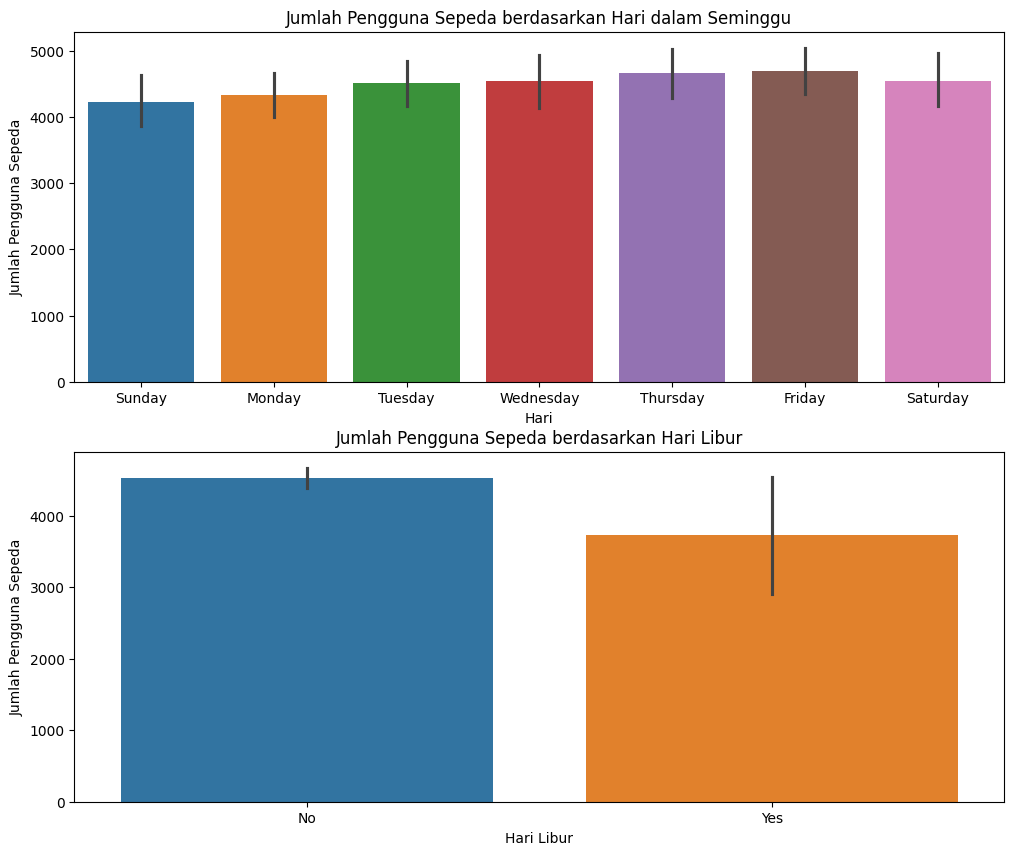

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.barplot(x="weekday", y="count", data=df["day"], ax=axes[0], hue="weekday")
axes[0].set_title("Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu")
axes[0].set_xlabel("Hari")
axes[0].set_ylabel("Jumlah Pengguna Sepeda")

sns.barplot(x="holiday", y="count", data=df["day"], ax=axes[1], hue="holiday")
axes[1].set_title("Jumlah Pengguna Sepeda berdasarkan Hari Libur")
axes[1].set_xlabel("Hari Libur")
axes[1].set_ylabel("Jumlah Pengguna Sepeda")

plt.show()

Berdasarkan hasil di atas, dapat disimpulkan bahwa:
1. persebaran jumlah sepeda yang disewa dalam 1 minggu paling banyak pada hari jumat, dan paling sedikit pada hari minggu
2. pada hari kerja, jumlah sepeda yang disewa lebih banyak dibandingkan pada hari libur

### Pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah sepeda yang disewa?


Text(0.5, 1.0, 'Jumlah Pengguna Sepeda berdasarkan Musim')

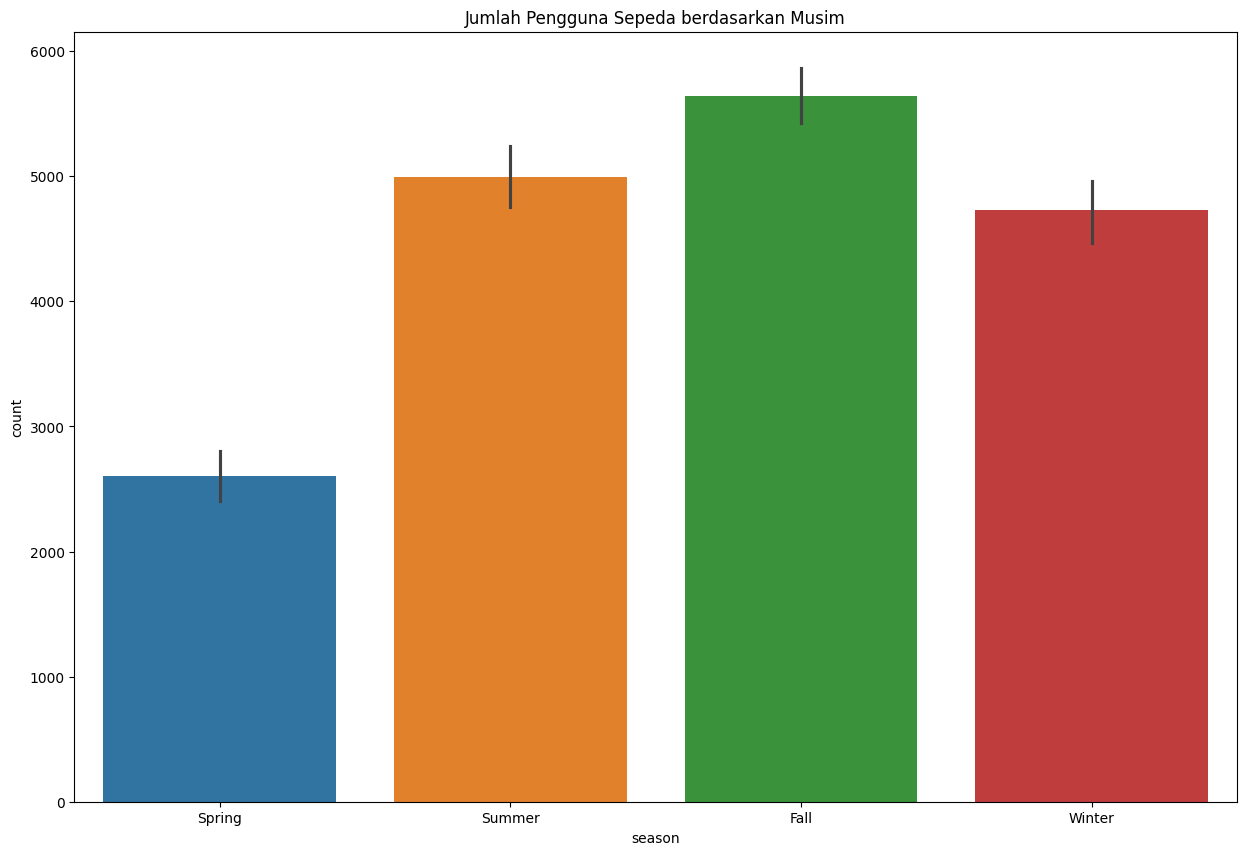

In [64]:
plt.figure(figsize=(15, 10))

sns.barplot(x="season", y="count", data=df["day"], hue="season")

plt.title("Jumlah Pengguna Sepeda berdasarkan Musim")

### Pertanyaan 3: Bagaimana pengaruh kondisi cuaca terhadap jumlah sepeda yang disewa?


Text(0.5, 1.0, 'Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')

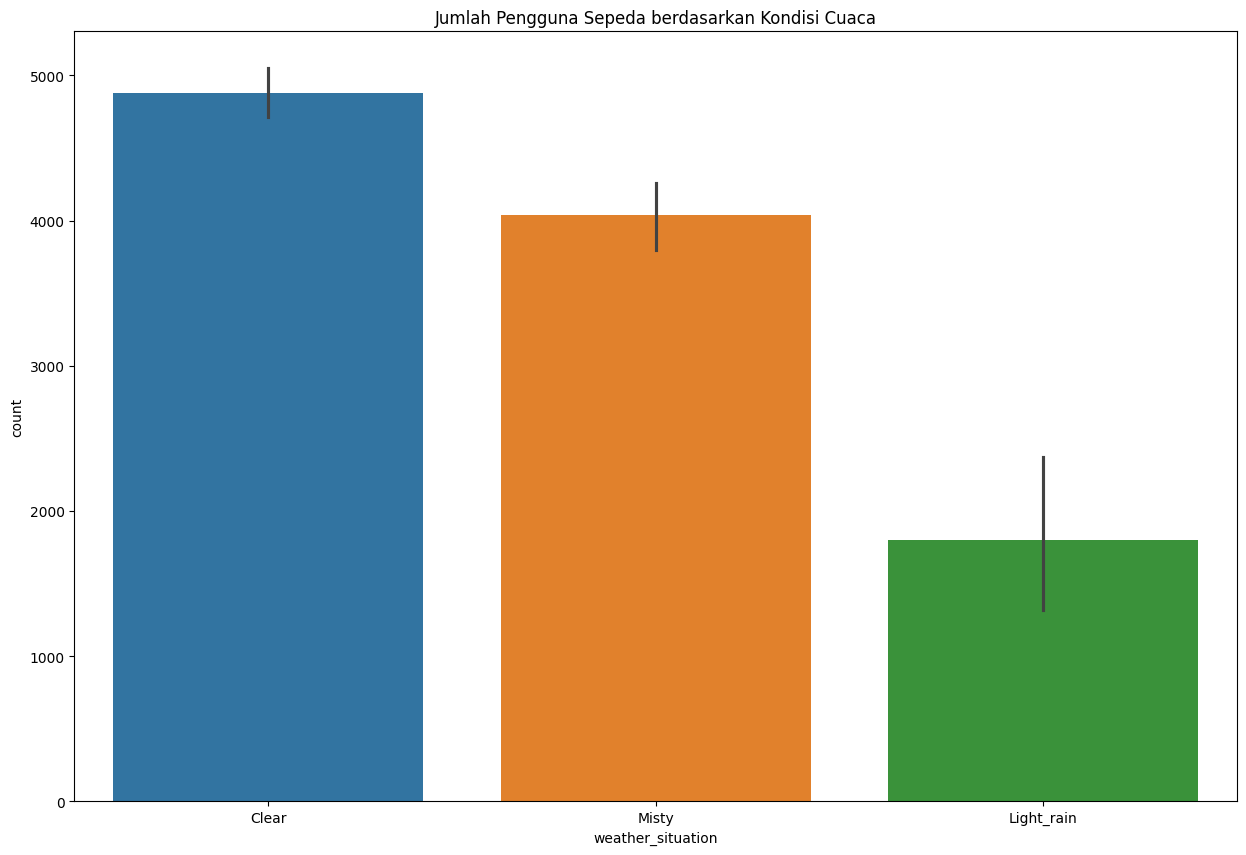

In [98]:
plt.figure(figsize=(15, 10))

sns.barplot(x="weather_situation", y="count", data=df["day"], hue="weather_situation")

plt.title("Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca")

### Pertanyaaan 4: Bagaimana tren jumlah sepeda yang disewa setiap tahunnya?

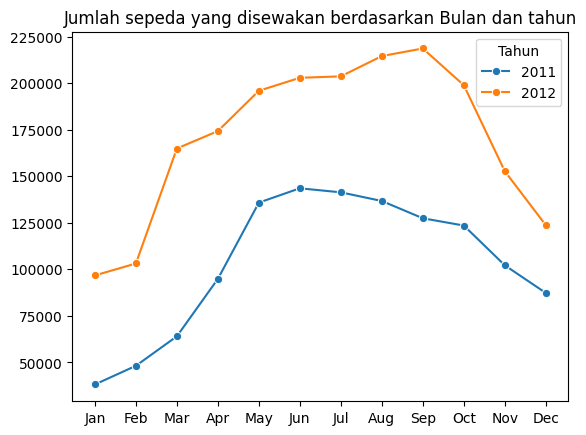

In [103]:
monthly_counts = (
    df["day"].groupby(by=["month", "year"]).agg({"count": "sum"}).reset_index()
)

sns.lineplot(x="month", y="count", data=monthly_counts, hue="year", marker="o")

plt.title("Jumlah sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun")
plt.show()

## Conclusion

- Conclution pertanyaan 1: Dapat disimpulkan bahwa persebaran jumlah sepeda yang disewa dalam 1 minggu paling banyak pada hari jumat, dan paling sedikit pada hari minggu. Pada hari kerja, jumlah sepeda yang disewa lebih banyak dibandingkan pada hari libur. Hal ini menunjukkan bahwa orang cenderung lebih suka menggunakan sepeda pada hari kerja dibandingkan hari libur, terutama pada hari jumat. meskipun perbedaannya tidak terlalu signifikan dari hari ke hari.
- Conclution pertanyaan 2: Dapat disimpulkan bahwa pada musim `Fall` memiliki jumlah peminjaman sepeda yang paling tinggi. Sedangkan `Spring` memiliki jumlah peminjaman sepeda yang paling rendah dan cukup jauh berbeda dengan musim lainnya. Kita dapat meningkatkan jumlah persediaan sepeda pada musim `Fall`. Pada musim spring terjadi penurunan yang signifikan. Hal ini cukup mengejutkan karena ternyata musim winter yang cenderung lebih dingin memiliki jumlah peminjaman sepeda yang
lebih tinggi dibandingkan musim spring yang cenderung lebih hangat. Hal ini mungkin disebabkan oleh faktor lain seperti kebiasaan masyarakat setempat, atau faktor lainnya yang tidak terduga.
- Conclution pertanyaan 3: Dapat disimpulkan bahwa pada hari yang cerah `Clear` memiliki jumlah peminjaman sepeda yang paling tinggi dan sangat berbeda jauh dengan kondisi cuaca lainnya. Hal ini menunjukkan bahwa orang cenderung lebih suka menggunakan sepeda pada hari yang cerah. Dan juga, tidak ada orang yang meminjam sepeda pada kondisi cuaca Heavy Rain. Hal ini wajar karena kondisi cuaca tersebut tidak memungkinkan untuk bersepeda.
- Conclution pertanyaan 4: Dapat disimpulkan bahwa tren jumlah sepeda yang disewa setiap tahunnya mengalami peningkatan yang signifikan. Hal ini menunjukkan bahwa semakin lama semakin banyak orang yang menggunakan sepeda. Namun, tren penyewaan sepeda setiap tahunnya terjadi peningkatan pada bulan-bulan tertentu dan penurunan pada bulan-bulan tertentu. Terjadi pula perbedaan puncak dan dasar pada tahun 2011 dan 2012. Puncak terjadi pada bulan September dan Oktober pada 2012, sedangkan pada 2011 terjadi pada bulan Juni. Dasar terjadi pada bulan Januari pada 2011 dan 2012.
Hal ini menunjukkan bahwa tren penyewaan sepeda setiap tahunnya dapat berbeda.
